# MNIST Handwritten Digit Classification

## Packages

Tensorflow and Keras provide an easy, fast, and powerful approach to generate neural network models.

In [1]:
import tensorflow as tf
from tensorflow import keras

The following packages are generally always worth loading for their data processing and data visualization tools.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Data

Keras conveniently provides the mnist dataset.

In [3]:
mnist = keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [4]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


Each row of the MNIST data is a handwritten digit. We can view each row:

9


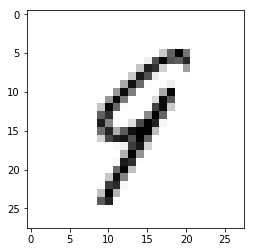

In [5]:
row_num = np.random.randint(60000)
print(ytrain[row_num])
plt.imshow(xtrain[row_num], cmap = "gray_r")

Before we start modelling, we must normalize the data. Each training column is normalized to be between 0 and 1. The test sample is normalized based on the training sample.

In [6]:
xtrain = (xtrain - xtrain.min()) / (xtrain.max() - xtrain.min())
xtest = (xtest - xtrain.min()) / (xtrain.max() - xtrain.min())

## Model 1 - Single Layer Softmax

Keras models are a sequential organization of layers.

Many models will begin with a Flatten layer: The 28x28 matrix input is converted to a vector of length 784. 

Every model will end with a Dense Softmax layer: The probabilities each class. The target class will have the highest probability.

In model 1, this is all that is done.

In [8]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Next, we compile the model to specify optimization method, loss function, etc.

In [9]:
model1.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

Now the model can be trained. Some options that we can configure are our validation split, batch size, and number of epochs.

In [10]:
model1.fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 21us/sample - loss: 1.4758 - acc: 0.6335 - val_loss: 0.8852 - val_acc: 0.8397
Epoch 2/5
54000/54000 [==============================] - 0s 9us/sample - loss: 0.7870 - acc: 0.8253 - val_loss: 0.5857 - val_acc: 0.8792
Epoch 3/5
54000/54000 [==============================] - 0s 9us/sample - loss: 0.5997 - acc: 0.8580 - val_loss: 0.4723 - val_acc: 0.8948
Epoch 4/5
54000/54000 [==============================] - 0s 9us/sample - loss: 0.5129 - acc: 0.8745 - val_loss: 0.4124 - val_acc: 0.9045
Epoch 5/5
54000/54000 [==============================] - 0s 9us/sample - loss: 0.4615 - acc: 0.8841 - val_loss: 0.3748 - val_acc: 0.9097


Finally, we can evaluate the fit on our test sample.

In [11]:
test_loss1, test_acc1 = model1.evaluate(xtest, ytest)
print("Loss: ", test_loss1)
print("Acc: ", test_acc1)

10000/10000 [==============================] - 0s 34us/sample - loss: 1.5948 - acc: 0.8988
Loss:  1.5948322447234997
Acc:  0.8988


And using sklearn and seaborn, we can plot a confusion matrix heatmap.

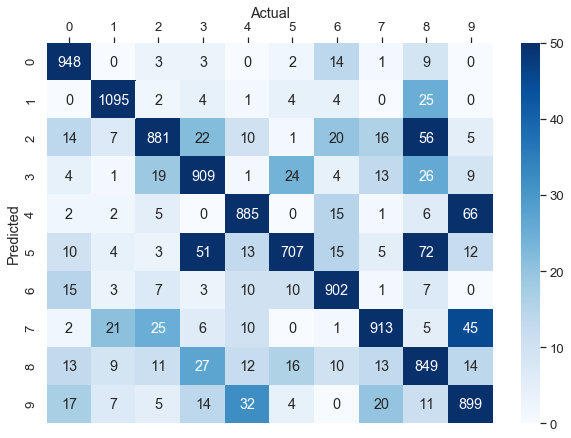

In [12]:
ypred1 = model1.predict_classes(xtest)
cm1 = metrics.confusion_matrix(ytest, ypred1)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 50)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

For this simple model, we can plot the weights for each class in a meaningul way.

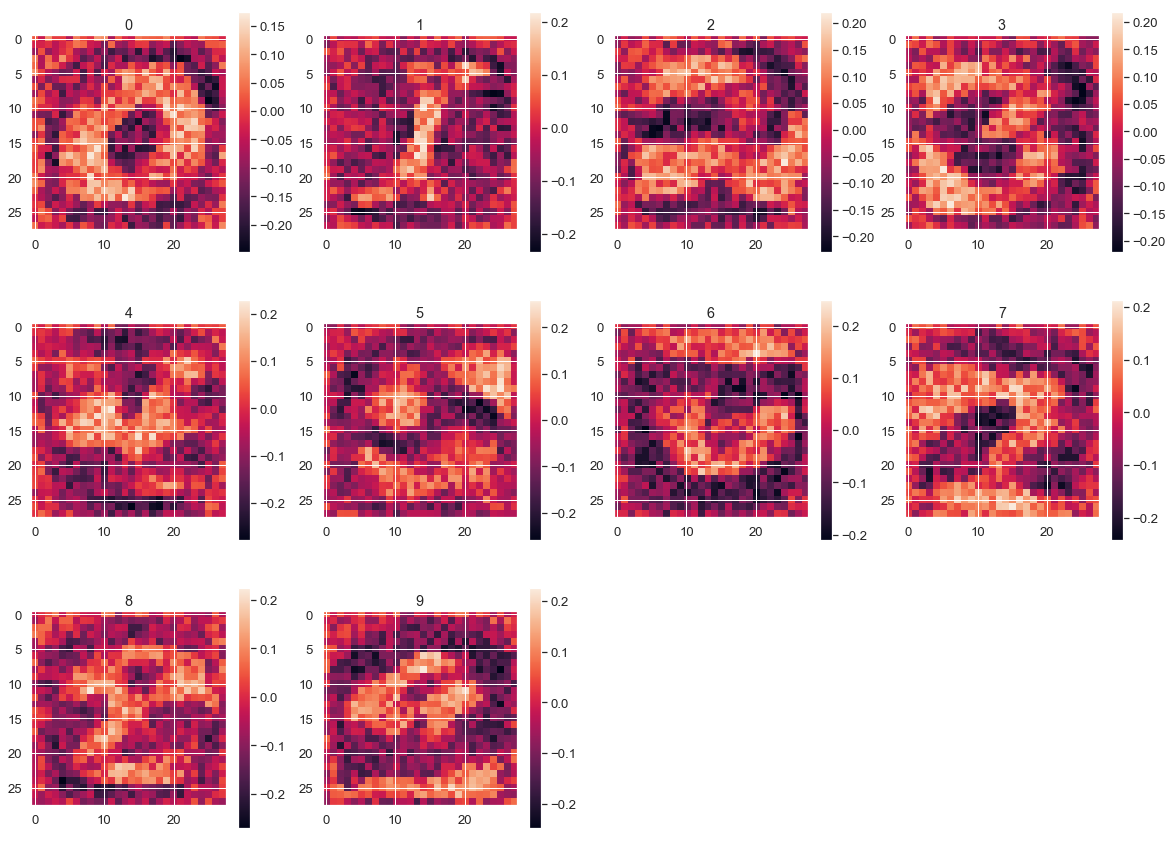

In [13]:
m1wts = model1.get_weights()
plt.figure(figsize = (20,15))
for i in range(0,10):
    plt.subplot(3,4,i+1).title.set_text(i)
    plt.imshow(m1wts[0][:,i].reshape(28,28))
    plt.colorbar()

### Hyperparameter Tuning

We try different combinations of hyperparameters, such as L2 regularization and dropout, by creating a dictionary of models and looping through them.

In [15]:
models1 = {
    "model1_1" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model1_2" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(10, activation = tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(1e-2))
        ])
    ],
    "model1_3" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(.8),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model1_4" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(.8),
        keras.layers.Dense(10, activation = tf.nn.softmax, kernel_regularizer=keras.regularizers.l2(1e-2))
        ])
    ]
}

In [16]:
for k in models1:
    # compile
    models1[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models1[k][0].fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models1[k].append(models1[k][0].evaluate(xtest, ytest))    

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 13us/sample - loss: 1.5340 - acc: 0.5946 - val_loss: 0.9123 - val_acc: 0.8212
Epoch 2/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.8026 - acc: 0.8194 - val_loss: 0.5941 - val_acc: 0.8823
Epoch 3/5
54000/54000 [==============================] - 0s 9us/sample - loss: 0.6071 - acc: 0.8572 - val_loss: 0.4758 - val_acc: 0.8985
Epoch 4/5
54000/54000 [==============================] - 1s 9us/sample - loss: 0.5178 - acc: 0.8734 - val_loss: 0.4140 - val_acc: 0.9057
Epoch 5/5
10000/10000 [==============================] - 0s 49us/sample - loss: 1.6381 - acc: 0.8956
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 13us/sample - loss: 1.7049 - acc: 0.5949 - val_loss: 1.0908 - val_acc: 0.8330
Epoch 2/5
54000/54000 [==============================] - 0s 9us/sample - loss: 0.9955 - acc: 0.8235 - val_loss: 0

In [17]:
for k in models1:
    print(k, ": Test Accuracy:",models1[k][1][1])

model1_1 : Test Accuracy: 0.8956
model1_2 : Test Accuracy: 0.8849
model1_3 : Test Accuracy: 0.8789
model1_4 : Test Accuracy: 0.8722


Here, we can see the effects that L2 regularization and droupout have on our weights.

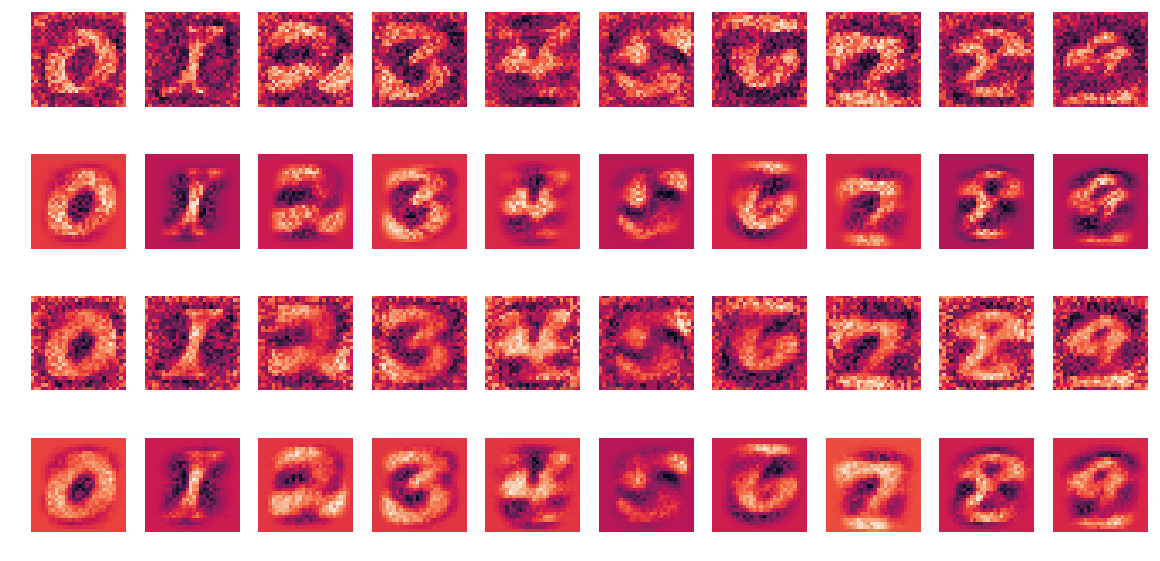

In [18]:
plt.figure(figsize = (20,10))

for i,k in enumerate(models1):
    m1wts = models1[k][0].get_weights()
    for j in range(0,10):
        plt.subplot(4,10,10*i+j+1)
        plt.imshow(m1wts[0][:,j].reshape(28,28))
        plt.axis('off')

## Model 2 - ReLu Hidden Layer

In model 2, we introduce a ReLu (Rectified Linear) hidden layer. 

ReLu(x) = max(0,x)

Again, we train multiple models at once to see the effects of different hyperparameters.

In [19]:
models2 = {
    "model2_1" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model2_2" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model2_3" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model2_4" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [20]:
for k in models2:
    # compile
    models2[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models2[k][0].fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models2[k].append(models2[k][0].evaluate(xtest, ytest))  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 14us/sample - loss: 0.5832 - acc: 0.8440 - val_loss: 0.2259 - val_acc: 0.9385
Epoch 2/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.2428 - acc: 0.9316 - val_loss: 0.1688 - val_acc: 0.9572
Epoch 3/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.1850 - acc: 0.9485 - val_loss: 0.1407 - val_acc: 0.9640
Epoch 4/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.1495 - acc: 0.9585 - val_loss: 0.1201 - val_acc: 0.9675
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.5757 - acc: 0.9635
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 16us/sample - loss: 0.6394 - acc: 0.8428 - val_loss: 0.2761 - val_acc: 0.9392
Epoch 2/5
54000/54000 [==============================] - 1s 10us/sample - loss: 0.2872 - acc: 0.9319 - val_loss

In [21]:
for k in models2:
    print(k, ": Test Accuracy:",models2[k][1][1])

model2_1 : Test Accuracy: 0.9635
model2_2 : Test Accuracy: 0.9642
model2_3 : Test Accuracy: 0.9622
model2_4 : Test Accuracy: 0.9606


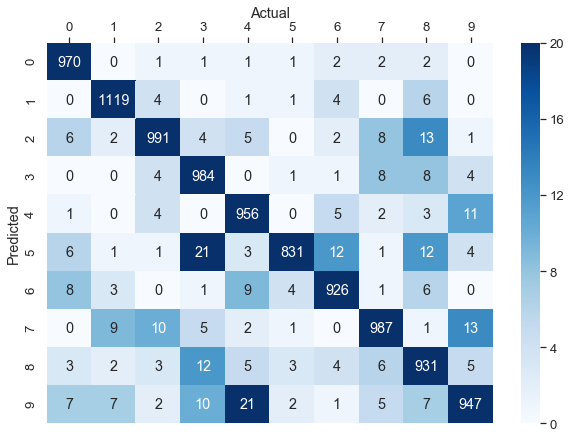

In [23]:
ypred2 = models2["model2_2"][0].predict_classes(xtest)
cm1 = metrics.confusion_matrix(ytest, ypred2)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 20)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

## Model 3 - ReLu Hidden Layers

For model 3, lets add another ReLu layer, for a total of 2.

In [24]:
models3 = {
    "model3_1" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model3_2" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model3_3" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model3_4" : [
        keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [25]:
for k in models3:
    # compile
    models3[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models3[k][0].fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models3[k].append(models3[k][0].evaluate(xtest, ytest))  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 16us/sample - loss: 0.5044 - acc: 0.8614 - val_loss: 0.1633 - val_acc: 0.9582
Epoch 2/5
54000/54000 [==============================] - 1s 12us/sample - loss: 0.1673 - acc: 0.9517 - val_loss: 0.1222 - val_acc: 0.9653
Epoch 3/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.1117 - acc: 0.9671 - val_loss: 0.1003 - val_acc: 0.9737
Epoch 4/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.0784 - acc: 0.9771 - val_loss: 0.0823 - val_acc: 0.9765
Epoch 5/5
10000/10000 [==============================] - 1s 59us/sample - loss: 0.3927 - acc: 0.9754
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 17us/sample - loss: 0.6015 - acc: 0.8630 - val_loss: 0.2707 - val_acc: 0.9500
Epoch 2/5
54000/54000 [==============================] - 1s 11us/sample - loss: 0.2651 - acc: 0.9487 - val_loss

In [26]:
for k in models3:
    print(k, ": Test Accuracy:", models3[k][1][1])

model3_1 : Test Accuracy: 0.9754
model3_2 : Test Accuracy: 0.9741
model3_3 : Test Accuracy: 0.9736
model3_4 : Test Accuracy: 0.9729


In [27]:
# for my laptop

# compile
models3["model3_4"][0].compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
# train
models3["model3_4"][0].fit(xtrain, ytrain, validation_split=.1, batch_size=1000, epochs=5)
# evaluate
models3["model3_4"][0].evaluate(xtest, ytest)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 1s 20us/sample - loss: 0.1953 - acc: 0.9640 - val_loss: 0.1504 - val_acc: 0.9790
Epoch 2/5
54000/54000 [==============================] - 1s 12us/sample - loss: 0.1728 - acc: 0.9704 - val_loss: 0.1473 - val_acc: 0.9800
Epoch 3/5
54000/54000 [==============================] - 1s 12us/sample - loss: 0.1605 - acc: 0.9724 - val_loss: 0.1376 - val_acc: 0.9818
Epoch 4/5
54000/54000 [==============================] - 1s 12us/sample - loss: 0.1471 - acc: 0.9760 - val_loss: 0.1321 - val_acc: 0.9818
Epoch 5/5
10000/10000 [==============================] - 1s 69us/sample - loss: 0.3569 - acc: 0.9818


[0.3569335904598236, 0.9818]

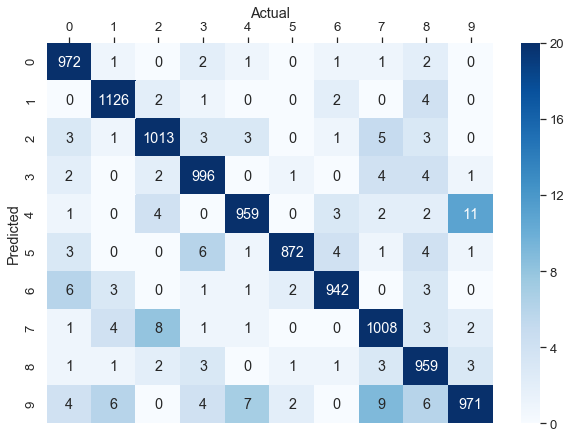

In [28]:
ypred3 = models3["model3_4"][0].predict_classes(xtest)
cm1 = metrics.confusion_matrix(ytest, ypred3)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 20)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

## Model 4 - CNN

Finally, let's use a convolutional neural network.

Each model uses two convolution layers seperated by a max pooling layer.

The first convolution layer consists of 64 filters, and a 3x3 window.

Then, there is a max pooling layer with a 2x2 window.

The second convolution layer has 32 filters, and a 3x3 window.

Afterwards, we flatten the image and pass on to a dense reLu layer, with possible L2 regularization and dropout.

In [40]:
# GPU recommended

models4 = {
    "model4_1" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model4_2" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model4_3" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model4_4" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [41]:
# GPU recomended

for k in models4:
    # compile
    models4[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models4[k][0].fit(xtrain.reshape(60000,28,28,1), ytrain, validation_split=.1, batch_size=1000, epochs=5)
    # evaluate
    models4[k].append(models4[k][0].evaluate(xtest.reshape(10000,28,28,1), ytest))  

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 39us/sample - loss: 0.4819 - acc: 0.8690 - val_loss: 0.1177 - val_acc: 0.9682
Epoch 2/5
54000/54000 [==============================] - 1s 26us/sample - loss: 0.0981 - acc: 0.9708 - val_loss: 0.0684 - val_acc: 0.9817
Epoch 3/5
54000/54000 [==============================] - 1s 26us/sample - loss: 0.0595 - acc: 0.9821 - val_loss: 0.0538 - val_acc: 0.9860
Epoch 4/5
54000/54000 [==============================] - 1s 26us/sample - loss: 0.0455 - acc: 0.9860 - val_loss: 0.0456 - val_acc: 0.9870
Epoch 5/5
10000/10000 [==============================] - 1s 99us/sample - loss: 0.2013 - acc: 0.9870
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 2s 43us/sample - loss: 0.5712 - acc: 0.8669 - val_loss: 0.2086 - val_acc: 0.9632
Epoch 2/5
54000/54000 [==============================] - 1s 26us/sample - loss: 0.1847 - acc: 0.9669 - val_loss

In [43]:
# for my laptop

# compile
models4["model4_3"][0].compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
# train
models4["model4_2"][0].fit(xtrain.reshape(60000,28,28,1), ytrain, validation_split=.1, batch_size=1000, epochs=2)
# evaluate
models4["model4_2"][0].evaluate(xtest.reshape(10000,28,28,1), ytest)

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
54000/54000 [==============================] - 1s 26us/sample - loss: 0.0822 - acc: 0.9896 - val_loss: 0.0912 - val_acc: 0.9873
Epoch 2/2
10000/10000 [==============================] - 1s 94us/sample - loss: 0.2349 - acc: 0.9878


[0.23489073432087898, 0.9878]

In [44]:
for k in models4:
    print(k, ": Test Accuracy:", models4[k][1][1])

model4_1 : Test Accuracy: 0.987
model4_2 : Test Accuracy: 0.9871
model4_3 : Test Accuracy: 0.9897
model4_4 : Test Accuracy: 0.9861


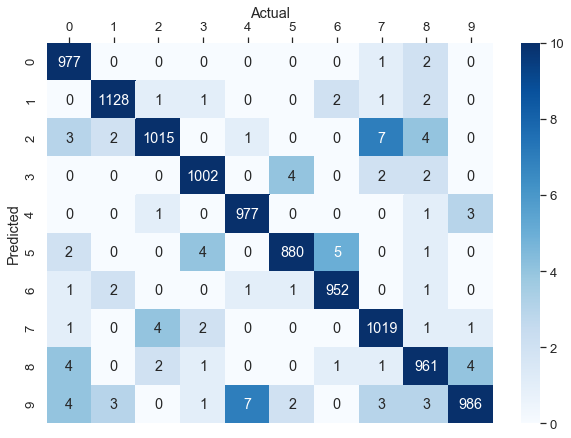

In [45]:
ypred4 = models4["model4_3"][0].predict_classes(xtest.reshape(10000,28,28,1))
cm1 = metrics.confusion_matrix(ytest, ypred4)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 10)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

## Best Model

In [46]:
models = {**models1, **models2, **models3, **models4}
acc = {}
for k in models:
    acc[k] = models[k][1][1]
bestModel = max(acc, key=acc.get)
print("Best Accuracy Model:", bestModel)
print("with accuracy:", models[bestModel][1][1])

Best Accuracy Model: model4_3
with accuracy: 0.9897


Lets look at some examples of misclassifications.

In [64]:
ypred4 = models[bestModel][0].predict_classes(xtest.reshape(10000,28,28,1))
errors4 = list(np.where((ypred4 == ytest) == False)[0])

Actual: 5
Predicted: 6


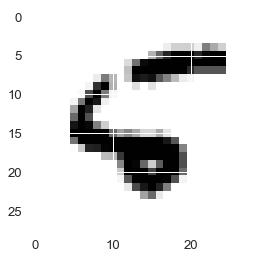

In [65]:
row_num = errors4[0]
print("Actual:", ytest[row_num])
print("Predicted:", ypred4[row_num])
plt.imshow(xtest[row_num], cmap = "gray_r")

Actual: 9
Predicted: 8


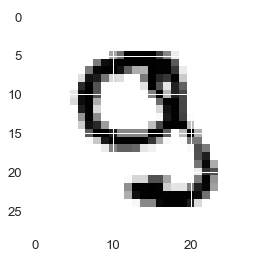

In [66]:
row_num = errors4[1]
print("Actual:", ytest[row_num])
print("Predicted:", ypred4[row_num])
plt.imshow(xtest[row_num], cmap = "gray_r")

Actual: 2
Predicted: 7


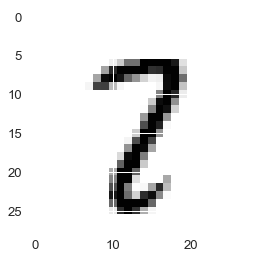

In [67]:
row_num = errors4[2]
print("Actual:", ytest[row_num])
print("Predicted:", ypred4[row_num])
plt.imshow(xtest[row_num], cmap = "gray_r")

## Early Stopping

Let's take the architecture of the best model, set up some finer hyperparameter tuning, and let it train until the validation loss stops decreasing.

In [51]:
es = keras.callbacks.EarlyStopping(
    monitor = "val_loss",
    min_delta = 0,
    patience = 2,
    verbose = 0,
    mode = "auto"
)

In [55]:
models5 = {
    "model5_1" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ],
    "model5_2" : [
        keras.Sequential([
        keras.layers.Conv2D(64, kernel_size=3, activation=tf.nn.relu, input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, kernel_size=3, activation=tf.nn.relu),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(500, activation = tf.nn.relu, kernel_regularizer=keras.regularizers.l2(1e-4)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10, activation = tf.nn.softmax)
        ])
    ]
}

In [56]:
for k in models5:
    # compile
    models5[k][0].compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ["accuracy"]
    )
    # train
    models5[k][0].fit(xtrain.reshape(60000,28,28,1), 
                      ytrain, 
                      validation_split=.2, 
                      batch_size=1000, 
                      epochs=100, 
                      #verbose=0,
                      callbacks=[es])
    # evaluate
    models5[k].append(models5[k][0].evaluate(xtest.reshape(10000,28,28,1), ytest)) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 47us/sample - loss: 0.5376 - acc: 0.8480 - val_loss: 0.1663 - val_acc: 0.9526
Epoch 2/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.1301 - acc: 0.9602 - val_loss: 0.0826 - val_acc: 0.9768
Epoch 3/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0782 - acc: 0.9763 - val_loss: 0.0631 - val_acc: 0.9818
Epoch 4/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0572 - acc: 0.9827 - val_loss: 0.0533 - val_acc: 0.9834
Epoch 5/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0471 - acc: 0.9854 - val_loss: 0.0474 - val_acc: 0.9868
Epoch 6/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.0377 - acc: 0.9885 - val_loss: 0.0430 - val_acc: 0.9871
Epoch 7/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.0308 - acc: 0.9904 - val_l

In [57]:
for k in models5:
    print(k, ": Test Accuracy:", models5[k][1][1])

model5_1 : Test Accuracy: 0.9913
model5_2 : Test Accuracy: 0.9914


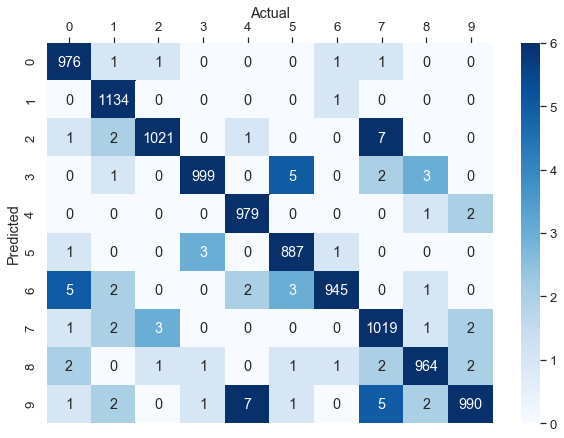

In [58]:
ypred5 = models5["model5_2"][0].predict_classes(xtest.reshape(10000,28,28,1))
cm1 = metrics.confusion_matrix(ytest, ypred5)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.2)
ax = sn.heatmap(cm1, annot = True, fmt = 'd', cmap = "Blues", vmax = 6)
ax.set(xlabel='Actual', ylabel='Predicted')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

In [69]:
errors5 = list(np.where((ypred5 == ytest) == False)[0])

In [77]:
print(len(errors5)-len(errors4))

-17


Actual: 2
Predicted: 7


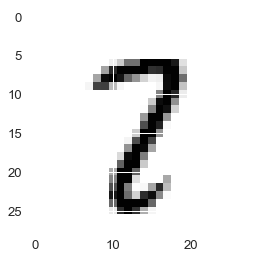

In [89]:
row_num = errors5[0]
print("Actual:", ytest[row_num])
print("Predicted:", ypred5[row_num])
plt.imshow(xtest[row_num], cmap = "gray_r")

Saving and loading models.

In [90]:
 models5["model5_2"][0].save("mnist_model.h5")

In [92]:
model = keras.models.load_model("mnist_model.h5")

# Application

## Real Time Recognition

In [11]:
import cv2
import time

Our model input is always a 28x28 image. We need to dynamically resize our new data to match our model without distorting the aspect ratio. We do this by padding whitespace around the edges.

In [137]:
def get_square(image,square_size):

    height,width=image.shape
    if(height>width):
      differ=height
    else:
      differ=width
    differ+=4

    mask = np.zeros((differ,differ), dtype="uint8")   
    x_pos=int((differ-width)/2)
    y_pos=int((differ-height)/2)
    mask[y_pos:y_pos+height,x_pos:x_pos+width]=image[0:height,0:width]
    mask=cv2.resize(mask,(square_size,square_size),interpolation=cv2.INTER_AREA)

    return mask 

The capture function does some image processing to identify and label digits in the image. Our model is doing the predicting!

In [178]:
def capture(image):
    #img = cv2.imread(file_name)

    img = image
    
    #img_final = cv2.imread(file_name)
    img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(img2gray, 100, 255, cv2.THRESH_BINARY)
    image_final = cv2.bitwise_and(img2gray, img2gray, mask=mask)
    ret, new_img = cv2.threshold(image_final, 100, 255, cv2.THRESH_BINARY_INV)  # for black text , cv.THRESH_BINARY_INV
    '''
            line  8 to 12  : Remove noisy portion 
    '''
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,
                                                         3))  # to manipulate the orientation of dilution , large x means horizonatally dilating  more, large y means vertically dilating more
    dilated = cv2.dilate(new_img, kernel, iterations=10)  # dilate , more the iteration more the dilation

    # for cv2.x.x

    _, contours, hierarchy = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

    #_, contours, hierarchy = cv2.findContours(new_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)  # findContours returns 3 variables for getting contours

    # for cv3.x.x comment above line and uncomment line below

    #image, contours, hierarchy = cv2.findContours(dilated,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    index = 0
    for contour in contours:
        # get rectangle bounding contour
        [x, y, w, h] = cv2.boundingRect(contour)

        # Don't plot small false positives that aren't text
        if w < 50 and h < 50:#35
            continue

        # draw rectangle around contour on original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
        
        font                   = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (x,y)
        fontScale              = 1
        fontColor              = (255,0,255)
        lineType               = 2

        cropped = mask[y :y +  h , x : x + w]
        cropped = cv2.bitwise_not(cropped)
        #cropped = cv2.resize(cropped, (28,28), interpolation=inter)
        cropped = get_square(cropped, 28)
        cropped = cropped.reshape(1,28,28) #DENSE
        #cropped = cropped.reshape(1,28,28,1) #CNN
        
        #print(cropped)
        
        #text_prediction = model1.predict_classes(cropped)
        text_prediction = models3["model3_4"][0].predict_classes(cropped)
        #text_prediction = models4["model4_1"][0].predict_classes(cropped)
        
        cv2.putText(img,str(text_prediction), 
            bottomLeftCornerOfText, 
            font, 
            fontScale,
            fontColor,
            lineType)
        
        ##for writing cropped
        #cropped = img_final[y :y +  h , x : x + w]
        #s = 'test' + '/crop_' + str(index) + '.jpg' 
        #cv2.imwrite(s , cropped)
        #index = index + 1

        
    # for writing results
    #cv2.imshow('captcha_result', img)
    #cv2.waitKey()
    return img

Finally, we call our function in a loop.

In [179]:
cap = cv2.VideoCapture(0)
while(True):
    # Capture frame by frame
    ret, frame = cap.read()

    # Display the resulting frame
    cv2.imshow('frame', capture(frame))
    
    # Stop on 'q' keypress
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    #time.sleep(1)
cap.release()
#cv2.destroyAllWindows()

This is what the capture function is doing to process the image.

In [184]:
n2 = cv2.imread("/Users/bernie/Documents/2.png")

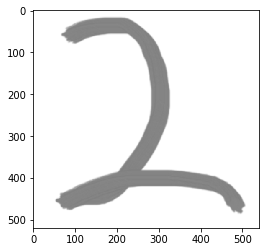

In [185]:
plt.imshow(n2, cmap="gray") # Original image produced in PAINT

Convert to greyscale, and then binary (either 0 or 255)

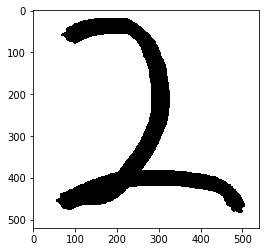

In [148]:
n2 = cv2.cvtColor(n2, cv2.COLOR_BGR2GRAY)
_, n2r = cv2.threshold(n2, 200, 255, cv2.THRESH_BINARY)
plt.imshow(n2r, cmap="gray")

In [149]:
n2r.shape

(520, 540)

The image is 520x540. We need to downsample to 28x28.

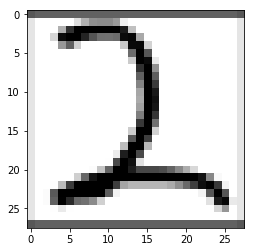

In [152]:
n2s = get_square(n2r, 28)
plt.imshow(n2s, cmap = "gray")

An interesting bit about the mnist dataset (or at least the one supplied by keras) is that the digits are white on a black background!

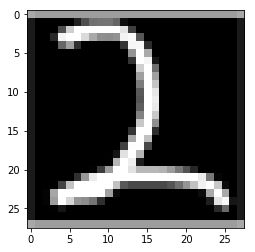

In [153]:
n2si = cv2.bitwise_not(n2s)
plt.imshow(n2si, cmap="gray")

Finally, we can apply our model. 

In [154]:
model1.predict_classes(n2si.reshape(1,28,28))

array([2])